# Python para economistas

### Mtro. Diego López Tamayo
#### El Colegio de México
#### BBVA Research

# Introducción a  Numpy & Scipy
## Sesión 3 

- Introducción a Numpy & Scipy
- Funciones principales
- Operaciones básicas en Numpy
- Vectores y matrices 
- Operaciones, transp, inversa, determinante
- Medias, varianzas, desv.
- Álgebra lineal con Scipy
- (Extra) Interpolación, Integral, Optimización

## Numerical Python - Numpy

**Numpy** es el paquete fundamental para la computación numérica con Python. Proporciona formas poderosas de crear, almacenar y manipular datos, lo que lo hace capaz de integrarse sin problemas y con rapidez con una amplia variedad de bases de datos y formatos de datos. Esta es también la base sobre la que se basa **Pandas**, que es un paquete centrado en datos de alto rendimiento sobre el que aprenderemos más en este curso. 

Hoy hablaremos sobre la creación de matrices con ciertos tipos de datos, la manipulación de matrices, la selección de elementos de matrices y la carga de conjuntos de datos en matrices. Estas funciones son útiles para manipular datos y comprender las funcionalidades de otros paquetes de datos de Python comunes.

In [1]:
# Para importar la librería 
import numpy as np

# Para hacer algunas gráficas de ejemplo
import matplotlib.pyplot as plt
### Sobre las gráficas se hablará a detalle en otra sesión

### Sobre las diferencias entre listas y numpy array

- Similar
    - Ambos usan corchetes ([])
    - Ambos tipos de datos son mutables
    - Ambos se pueden indexar y se pueden utilizar para "slicing*

- Distinto
    - Una lista no puede manejar directamente una operación matemática, mientras que un array puede
    - Un array consume menos memoria que una lista. Usar un array s más rápido que una lista
    - Una lista puede constar de diferentes tamaños de datos anidados
    - Una lista puede almacenar diferentes tipos de datos.

[Ver más](https://python.plainenglish.io/python-list-vs-numpy-array-whats-the-difference-7308cd4b52f6)


## Arrays
Un elemento ndarray (multidimensinoal-array) es un contenedor genérico de datos homogéneos, es decir que todos sus elementos deben ser del mismmo tipo. 


In [2]:
# La forma más fácil de crear un array es con la función homónima, 
# que acepta cualquier secuencia de objetos como listas o otros arrays
a = np.array([1,2,3])
print(a)
# Se puede ver la dimensión de un array con el atributo ndim
print(a.ndim)

[1 2 3]
1


In [3]:
# Si usamos como argumento una lista de listas en np.array se obtiene un array multidimensional (una matriz)
b = np.array([[1,2,3], [4,5,6]])
print(b)
# Usamos el atributo shape para ver la longitud de cada dimensión del ndarray 
print(b.shape)
# También podemos ver el tipo de elementos que contiene con el atributo dtype
print(b.dtype)

[[1 2 3]
 [4 5 6]]
(2, 3)
int32


In [4]:
# También existen funciones especiales para crear ciertos arrays
# Vector de ceros
d = np.zeros(10)
print(d)
# Matriz de unos 
e = np.ones((3,3))
print(e)
# Matriz de números aleatorios 
np.random.rand(3,3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[0.25544528, 0.7897169 , 0.3385127 ],
       [0.08892373, 0.16647822, 0.01327074],
       [0.19355774, 0.06123687, 0.36784095]])

In [5]:
# Otra función útil es arange, que crea una secuencia de números dentro de un rango
ee = np.arange(10)
print(ee)

# Cuando introducimos 3 argumentos, el primero determina el elemento inicial, 
# el segundo el límite superior y el tercero la diferencia entre cada número. 
# Ejemplo: array del 10 (incluído) al 50 (excluído) en pasos de 2 unidades.
f = np.arange(10, 50, 2)
print(f)

[0 1 2 3 4 5 6 7 8 9]
[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]


In [6]:
# Por el contrario, la función linspace crea una sucesión de números 
# donde el tercer argumento es el número total de elementos.  
# Ejemplo: 15 números del 0 al 2 (note que esta función incluye los límites).
np.linspace(0, 2, 15) 

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        , 1.14285714, 1.28571429,
       1.42857143, 1.57142857, 1.71428571, 1.85714286, 2.        ])

# Operaciones con arrays
Podemos hacer muchas cosas con arrays como suma, resta, cuadrado, exponentes, así como matrices boleanas. También podemos hacer manipulaciones de matrices, como transposición, inversa, determinantes, etc.

In [7]:
# Las operaciones aritméticas sobre arrays son "element-wise"
a = np.array([10,20,30,40])
b = np.array([1,2,3,4])

print(a-b) # suma
print(a-b) # resta
print(a*b) # multiplicación element-wise
print(2*a) # multiplicación por un escalar 
print(a**0.8) # elevar a un exponente

[ 9 18 27 36]
[ 9 18 27 36]
[ 10  40  90 160]
[20 40 60 80]
[ 6.30957344 10.98560543 15.19487052 19.12705   ]


In [8]:
# Funciones universales (ufunc) 
# Son funciones que realizan operaciones elementwise sobre arrays. 

# ufuncs unitarias (un solo argumento)
print(np.sqrt(a)) # raíz cuadrada 
print(np.exp(b)) # exponencial
print(np.sum(a)) # suma de elementos
print(np.mean(a)) # promedio

[3.16227766 4.47213595 5.47722558 6.32455532]
[ 2.71828183  7.3890561  20.08553692 54.59815003]
100
25.0


In [9]:
# Otra forma de escribir algunas funciones
print(a.sum())
print(a.mean()) 
print(a.max())
print(a.min())

100
25.0
40
10


In [10]:
# ufuncs binarias (dos argumentos)
print(np.maximum(a,b))
print(np.minimum(a,b))
print(np.greater(a,b)) # <
print(np.greater_equal(b,a))

[10 20 30 40]
[1 2 3 4]
[ True  True  True  True]
[False False False False]


In [11]:
# También se pueden hacer operaciones algebráicas con matrices 
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])

# Producto de matrices (formas equivalentes)
print(A@B) 
print(np.dot(A, B))
print(A.dot(B))

[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [12]:
# Las matrices deben ser conformables para que el producto este determinado
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[6,23],[-1,7],[8,9]])
print(A@B)
print(B@A)
#print(A@np.ones(2)) # incorrecto
print(A@np.ones(3))  # correcto

[[ 28  64]
 [ 67 181]]
[[ 98 127 156]
 [ 27  33  39]
 [ 44  61  78]]
[ 6. 15.]


`numpy.linalg` contiene un conjunto de operaciones con matrices comunmente utilizadas en álgebra lineal, por ejemplo:

| Función      | Descripción |
| :---  |    :----   |   
| trace | Calcula la traza de una matriz  | 
| det   | Calcula el determinante        | 
| eig   | Calcula los eigenvalores y eigenvectores de una matriz |
| inv   | Calcula la inversa de una matriz | 
| solve | Resuelve el sistema lineal $Ax=b$, donde $A$ es matriz cuadrada |

In [13]:
help(np.linalg.eig)

Help on function eig in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    w : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    v : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``v[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``w[i]``.
    
    Raises
    ------
    LinAlgError
        If the eigenvalue computation does not converg

## `numpy.linalg`

Las funciones de álgebra lineal de NumPy proporcionan implementaciones eficientes de bajo nivel de algoritmos de álgebra lineal estándar.

In [15]:
from numpy.linalg import inv, solve 
A = np.random.rand(2,2)
print(A)
print(A.T) # transpuesta
print(inv(A)) # inversa

[[0.85279671 0.30441301]
 [0.19426799 0.44157723]]
[[0.85279671 0.19426799]
 [0.30441301 0.44157723]]
[[ 1.39106649 -0.95896871]
 [-0.61198738  2.68649933]]


Resuelva el siguiente sistema de ecuaciones: 
$$
3x_0 + x_1 = 9 \\ 
x_0 + 2x_1 = 8
$$

$$
   \begin{bmatrix}
     3 & 1\\
     1 & 2
   \end{bmatrix}
   \begin{pmatrix}x_0 \\x_1 \end{pmatrix} =
   \begin{pmatrix}9\\8\end{pmatrix}
$$

$$
AX = B
$$

$$
\begin{array}{r}\hfill \left({A}^{-1}\right)AX=\left({A}^{-1}\right)B\\ \hfill \left[\left({A}^{-1}\right)A\right]X=\left({A}^{-1}\right)B\\ \hfill IX=\left({A}^{-1}\right)B\\ \hfill X=\left({A}^{-1}\right)B\end{array}
$$

$$
   \begin{bmatrix}
     3 & 1\\
     1 & 2
   \end{bmatrix}
   \begin{pmatrix}x_0 \\x_1 \end{pmatrix} =
   \begin{pmatrix}9\\8\end{pmatrix}
$$

In [19]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
print(inv(a)@b) 
# O bien 
x = solve(a, b)
print(x)

[2. 3.]
[2. 3.]


# Indexing y Slicing


In [52]:
# Los arrays unidimensionales se manejan igual que las listas de Python
arr1d = np.arange(15)
print(arr1d)
# Segundo elemento
print(arr1d[2])
# Elementos del 5 (inclusive) al 8 (excluido)
print(arr1d[5:8])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2
[5 6 7]


Una primera distinción importante de las listas integradas de Python es que los slides del array son vistas del array original. Esto significa que los datos no se copian y cualquier modificación a la vista se reflejará en la matriz de origen.

In [51]:
# Creamos un slice a partir del array original
arr1d_slice = arr1d[12:15]
print(arr1d_slice)
# Modificamos los valores 
arr1d_slice[0] = 22
arr1d_slice[1] = 33
arr1d_slice[2] = 44
print(arr1d_slice)
# Ahora vemos nuestro vector original 
print(arr1d)
# Nótese que los valores han cambiado incluso cuando sólo modificamos el vector creado

[12 13 14]
[22 33 44]
[ 0  1  2  3  4  5  6  7  8  9 10 11 22 33 44]


In [35]:
# Como NumPy ha sido diseñado para poder trabajar con matrices muy grandes, 
# surgen problemas de rendimiento y memoria si NumPy insistiera en copiar siempre los datos. 
# Si desea una copia de una porción de un ndarray en lugar de una vista, 
# se debe copiar explícitamente la matriz, por ejemplo:
arr1d_slice2 = arr1d[12:15].copy()
# Modificamos los valores 
arr1d_slice2[0] = 222
arr1d_slice2[1] = 333
arr1d_slice2[2] = 444
print(arr1d_slice2)
print(arr1d_slice)

[222 333 444]
[22 33 44]


In [53]:
# En un array bidimensional, los elementos de cada índice ya no son escalares, 
# son matrices unidimensionales:
arr2d = np.array([[1,2], [3,4], [5,6]])
# Para acceder al segundo renglón
print(arr2d[1])

[3 4]


In [41]:
# Para acceder a cada elemento es necesario usar dos índices, uno de renglón y otro de fila
# Tercer renglón, segundo elemento
print(arr2d[2,1])
print(arr2d[2][1]) # alternativamente

6
6


In [7]:
# Array multidimensional (matriz con matrices):
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
# Índice con un solo elemento retorna una matriz 
print(arr3d[0])
# Índice con dos elementos retorna un renglón de una matriz
print(arr3d[1, 0])

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[1 2 3]
 [4 5 6]]
[7 8 9]


## Más sobre **slicing**

In [50]:
# Al igual que los objetos unidimensionales como las listas de Python, 
# los ndarrays se pueden dividir con la sintaxis familiar:
print(arr1d)
print(arr1d[5:9])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[5 6 7 8]


In [57]:
# Esto cambia un poco con los objetos bidimensionales
print(arr2d)
print(arr2d[:2])
# Como puede ver, se ha cortado a lo largo del eje 0, el primer eje. 
# Por tanto, un sector selecciona un rango de elementos a lo largo de un eje. 
# Puede resultar útil leer tal expresión como "seleccione las dos primeras filas de arr2d".

[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]]


In [60]:
# También pueden utilizar slides múltiples
print(arr2d[:, 1:])
# Se pueden asignar valores a una selección completa: 
arr2d[:, 1:] = 0
print(arr2d)

[[2]
 [4]
 [6]]
[[1 0]
 [3 0]
 [5 0]]


## Boolean Indexing
Sirve para crear arrays que satisfacen cierta característica lógica. 

In [3]:
# Creamos un vector de nombres
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
# Generamos un vector lógico a partir del vector de nombres
print(names == 'Bob')
print(names != 'Bob')

[ True False False  True False False False]
[False  True  True False  True  True  True]


In [5]:
# Podemos obtener elementos del vector original que satisfagan cierta característica
print(names[names != 'Bob'])
# Otra forma equivalente 
cond = names == 'Bob'
print(names[~cond])
# También se pueden usar condiciones con "y (&)" o "o (|)""
cond2 = (names == 'Bob') | (names == 'Will')
print(names[cond2])

['Joe' 'Will' 'Will' 'Joe' 'Joe']
['Joe' 'Will' 'Will' 'Joe' 'Joe']
['Bob' 'Will' 'Bob' 'Will']


In [73]:
# Lo mismo se aplica con arrays numéricos. 
# Ejemplo: establecer en 0 todos los valores negativos en un conjunto de datos
data = np.random.randn(5, 4)
print(data)
data[data < 0] = 0
print(data)

[[-0.07932751  0.65743276 -1.41532763 -0.00607688]
 [ 0.18477325 -0.28320395  0.14093185  0.87757644]
 [-0.45279917 -0.20387673 -0.73286203 -0.24533402]
 [-0.58747067 -0.34703332  0.11754491  0.60283036]
 [-1.60157992 -0.98343596  0.4354466  -0.55464804]]
[[0.         0.65743276 0.         0.        ]
 [0.18477325 0.         0.14093185 0.87757644]
 [0.         0.         0.         0.        ]
 [0.         0.         0.11754491 0.60283036]
 [0.         0.         0.4354466  0.        ]]


# Métodos estadísticos
Se puede acceder a un conjunto de funciones matemáticas que calculan estadísticas sobre un array completo o sobre los datos a lo largo de un eje como métodos de la clase array. Se pueden usar agregaciones (a menudo llamadas reducciones) como suma, media y std (desviación estándar), usando las funciones de NumPy.

In [14]:
# Creamos una matriz 
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])
print(arr) # Calculamos la media de todos los valores:
print(arr.mean()) # np.mean(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
4.0


In [10]:
# calcular la suma de las columnas
print(arr.sum(axis=0))
# Calcular la media de los renglones
print(arr.mean(axis=1))

[ 9 12 15]
[1. 4. 7.]


Otros métodos como `cumsum` y `cumprod` no se agregan, sino que producen una matriz de resultados intermedios:

In [15]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [16]:
# Suma de Gauss
arr2 = np.arange(101)
arr2.cumsum()

array([   0,    1,    3,    6,   10,   15,   21,   28,   36,   45,   55,
         66,   78,   91,  105,  120,  136,  153,  171,  190,  210,  231,
        253,  276,  300,  325,  351,  378,  406,  435,  465,  496,  528,
        561,  595,  630,  666,  703,  741,  780,  820,  861,  903,  946,
        990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431, 1485,
       1540, 1596, 1653, 1711, 1770, 1830, 1891, 1953, 2016, 2080, 2145,
       2211, 2278, 2346, 2415, 2485, 2556, 2628, 2701, 2775, 2850, 2926,
       3003, 3081, 3160, 3240, 3321, 3403, 3486, 3570, 3655, 3741, 3828,
       3916, 4005, 4095, 4186, 4278, 4371, 4465, 4560, 4656, 4753, 4851,
       4950, 5050], dtype=int32)

En arrays multidimensionales, las funciones de acumulación como `cumsum` devuelven una matriz del mismo tamaño, pero con los agregados parciales calculados a lo largo del eje indicado de acuerdo con cada corte dimensional inferior.

In [19]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
# Suma acumulada por columnas
print(arr.cumsum(axis=0))
# Suma acumulada por renglones
print(arr.cumsum(axis=1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


Métodos estadísticos básicos de arrays: 

| Método | Descripción | 
| :--- | :--- | 
| sum | Suma de todos los elementos del array o a lo largo de un eje |
| mean | Media artimética |
| std, var | Desviación estándar y varianza, respectivamente |
| cov | Calcula la matriz de covarianza de un conjunto de datos |
| min, max | Mínimo y máximo |
| argmin, argmax | Iíndices de los elementos mínimo y máximo, respectivamente |
| cumsum | Suma acumulada de elementos empezando desde 0 |

## Métodos para arrays booleanos

In [11]:
# Los valores booleanos son tomados como 1 (True) y 0 (False) en los métodos numéricos.
# Número de valores positivos generados por una normal estándar
arr = np.random.randn(100)
(arr > 0).sum()

47

In [22]:
# "any" cuenta si uno o más valores en un array es True
bools = np.array([False, False, True, False])
print(bools.any())
# "all" cuenta si cada valor en un array es True
print(bools.all())

True
False


## Sorting
Al igual que el tipo de lista incorporado de Python, las matrices NumPy se pueden ordenar en el lugar con el método de clasificación:

In [27]:
arr = np.random.randn(6)
print(arr)
# En orden ascendente
arr.sort()
print(arr)
# En orden descendente
arr[::-1].sort()
print(arr)

[ 0.95097494  1.24266259  1.07371347 -0.04139593 -0.72714538  0.06995498]
[-0.72714538 -0.04139593  0.06995498  0.95097494  1.07371347  1.24266259]
[ 1.24266259  1.07371347  0.95097494  0.06995498 -0.04139593 -0.72714538]


Se puede ordenar cada sección unidimensional de valores en una matriz multidimensional en su lugar a lo largo de un eje pasando el número de eje para ordenar:

In [25]:
arr = np.random.randn(5, 3)
# Odernar de menor a mayor por renglones 
arr.sort(1)
arr

array([[-0.20669589, -0.19861356,  1.86123285],
       [-0.66454032,  1.07883449,  1.5299197 ],
       [ 0.49159633,  1.08784181,  2.37978713],
       [-0.9364646 , -0.6832373 , -0.25233133],
       [-1.03877738,  0.82731848,  1.02840385]])

# Generación de números aleatorios
El módulo `numpy.random` complementa al módulo `random` que viene inetegrado en Python, con funciones para generar de manera más eficiente matrices completas de valores de muestra a partir de muchos tipos de distribuciones de probabilidad.

Algunas funciones relevantes de `numpy.random`:


| Función | Descripción |
| : --- | : --- |
| seed | Sembrar el generador de números aleatorios |
| randint | Extraer números enteros aleatorios dentro de un rango |
| randn | Extraer muestras de una distribución normal estándar |
| binomial | Sacar muestras de una distribución binomial |
| normal | Extraer muestras de una distribución normal (gaussiana) |
| beta | Extraer muestras de una distribución beta |
| chisquare | Extraer muestras de una distribución de chi-cuadrada |
| gamma | Extraer muestras de una distribución gamma |
| uniform | Extraer muestras de una distribución [0, 1) uniforme |

In [12]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : fl

Decimos que estos son números pseudoaleatorios porque son generados por un algoritmo con comportamiento determinista basado en la semilla del generador de números aleatorios.

In [21]:
# Semilla 
np.random.seed(1234)
# Media y desviación estándar 
mu, sigma = 10, 0.5 
# Generamos una muestra "pseudoaleatoria"
s = np.random.normal(mu, sigma, 1000)
s[0:10]

array([10.23571758,  9.40451215, 10.71635348,  9.84367405,  9.63970563,
       10.44358147, 10.42979421,  9.68173825, 10.00784819,  8.87865752])

In [44]:
# Dentro de esta función también se pueden crear matrices
ss = np.random.normal(size=(4, 4))
# Idéntico a: 
# ss = np.random.randn(4,4)
ss

array([[ 0.83532714, -1.90852308,  0.44747372, -0.55670098],
       [ 0.29561776, -1.98954322,  0.8795335 ,  0.29906874],
       [-0.12903187,  0.03815418,  0.68544808,  0.34782839],
       [-0.8341233 ,  0.88507465, -1.06809768,  0.02152768]])

# Random walk

Caminar es simplemente la suma acumulativa de pasos aleatorios $\Rightarrow$ Usamos el módulo np.random para obtener 1,000 monedas lanzadas a la vez, establecerlas en 1 y –1, y calcular la suma acumulada.  

Fuente: [Markovian Random Walks : One Dimensional Simple Random Walks](https://fse.studenttheses.ub.rug.nl/22617/1/bMATH_2020_HillAF.pdf). $X_i$ secuencia de v.a. que siguen una distribución simétrica con prob. Ber(p,q)

In [31]:
nsteps = 10
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1) # where igual a ifelse() de R

print(draws)
print(steps)

[0 0 1 1 0 1 0 0 1 1]
[-1 -1  1  1 -1  1 -1 -1  1  1]


In [32]:
walk = steps.cumsum()
print(walk)

[-1 -2 -1  0 -1  0 -1 -2 -1  0]


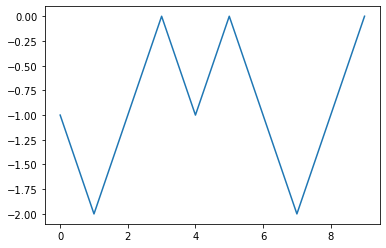

In [33]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

# Aplicación de econometría

## Estimador de MCO univariado


Pasos: 

1. Generar una muestra i.i.d. de variables aleatorias $\{x_i\}_{i=1}^{200}$ con distribución normal con media 20 y desviación estándar 2. 
2. Generar una muestra i.i.d. $\big\{u_i \big\}_{i=1}^{200}$ de v.a.s donde $u_i \sim N_2(0,1)$, $i=1,2,...,200$ tal que $u_i$ y $x_i$ son independientes $\forall i \neq j$ , $i,j \in  \{1,2,...,200\}$.


3. Usando los datos obtenidos en 1. y 2., generar la muestra $\{y_i\}_{i=1}^{200}$  donde $y_i=0.6+0.4x_i+u_i$ , $i=1,2,...,200$.
4. Con los datos obtenidos estimar por mínimos cuadrados ordinarios $b_0$ y $b_1$ en: 
$$ 
y_i=b_0+b_1x_i+u_i \;,\;  i=1,2,...,200
$$
obteniendo así los estimados $\hat{b}_{MCO}= \begin{pmatrix}  \hat b_{0} \\ \hat b_{1} \end{pmatrix} = (X'X)^{-1}X'Y$

In [23]:
# Semilla para reproducibilidad
np.random.seed(1234)
# Vector x
x = np.random.normal(20,2,200)
# Vector u
u = np.random.randn(200)
# Vector Y
Y = 0.6 + 0.4*x + u
Y

array([ 8.65758673,  7.02722636,  9.90316395,  7.77842313,  9.0811622 ,
        8.51824154,  8.76304339,  8.16265924, 10.52331652,  7.59381672,
       10.03311072,  8.84714054, 10.40660396,  9.0907813 ,  9.79266559,
        9.61710015,  9.67354733,  8.15575207, 10.09719295,  8.05144741,
        8.16123681,  9.99975784,  9.16594112,  9.93351608,  9.88088447,
        6.14593788,  8.75255704,  7.05927125,  9.57989899,  9.69428707,
        8.40289962,  9.16893406,  9.28096372,  8.69628158,  8.04332091,
        8.75178196,  9.28084368, 11.10560824,  9.67266521, 11.18125658,
        8.38518594,  8.64732616,  9.49197841,  5.88839006,  7.40617968,
        9.03619681,  9.67250824,  9.0060028 ,  8.32328409,  9.06729482,
       11.1366081 ,  5.73107801,  6.07133683,  8.64604663,  8.16516589,
        7.21531014,  8.04437334,  9.12551083,  8.54854793,  9.04808686,
        9.35001161,  8.74917895,  9.15938821,  9.2997217 ,  9.72611112,
        7.75617774, 10.58766024,  9.57957479,  8.28375397,  9.55

In [28]:
# from numpy.linalg import inv
# Matrix X (que incluye unos para estimar b_0)
X = np.array([np.ones(200), x]).T
# Estimar vector b
b = inv(X.T@X)@X.T@Y
b

array([1.74016855, 0.34934729])

## Estimador de MCO multivariado



Pasos: 
1. Generar una muestra i.i.d 
$$
 \begin{pmatrix}  Y_i \\ X_{1i}\\ X_{2i} \end{pmatrix}_{i=1}^{300} \sim N_3 \begin{bmatrix} \begin{pmatrix}  1 \\ 0\\ 2 \end{pmatrix}, \begin{pmatrix}  0.8 & 0.4 & -0.2 \\ 0.4 & 1.0 & -0.8 \\ -0.2 & -0.8 & 2.0 \end{pmatrix}  \end{bmatrix}
$$
$\forall i=1,2,\dots,300$. 

2. Con los datos obtenidos estimar el vector $\hat{b}_{MCO}= (X'X)^{-1}X'Y$

In [29]:
np.random.seed(2021)
# Fijamos el número de observaciones 
# Es útil poner un número bajo primero para ver lo que se está haciendo
n = 4
# Para los parámetros
mu = np.array([1,0,2])
sigma = np.array([[0.8, 0.4, -0.2], [0.4, 1, -0.8], [-0.2, -0.8, 2]])
# Generamos la muestra aleatoria
V = np.random.multivariate_normal(mu, sigma, n)
V

array([[ 1.15034001, -1.10298349,  4.19780709],
       [ 1.9384072 ,  0.52898506,  1.02695762],
       [ 1.06271462, -0.58770262,  3.80456607],
       [ 1.24624457, -0.6752329 ,  2.4604716 ]])

In [87]:
# El vector Y corresponde a la primera columna de la matriz V
Y = V[:,0]
print(Y)
# La matriz X se compone de un vector de unos y las dos últimas columnas de V
# A diferencia del caso anterior, aquí usamos la np.c_[ ... ] para añadir una columna 
## Análogamente existe np.r_[ ... ] para añadir renglones
X = np.c_[np.ones(n), V[:,1:3]]
print(X)

[1.15034001 1.9384072  1.06271462 1.24624457]
[[ 1.         -1.10298349  4.19780709]
 [ 1.          0.52898506  1.02695762]
 [ 1.         -0.58770262  3.80456607]
 [ 1.         -0.6752329   2.4604716 ]]


In [79]:
# Ahora calculamos b 
b = inv(X.T@X)@X.T@Y
b

array([0.7036571 , 0.53090539, 0.10805328])

# SciPy
SciPy es una colección de paquetes que abordan diferentes problemas estándar en la computación científica. Al igual que NumPy, SciPy es estable, maduro y ampliamente utilizado. De hecho, SciPy es un paquete que contiene varias herramientas que se construyen sobre NumPy, utilizando sus arrays junto con la funcionalidad relacionada. 

Aquí hay una muestra de los paquetes incluidos:

| Paquete | Descripción |
| :--- | :--- | 
| integrate | Rutinas de integración numérica y solucionadores de ecuaciones diferenciales |
| linalg | Rutinas de álgebra lineal y descomposiciones matriciales que se extienden más allá de las proporcionadas en `numpy.linalg` |
| optimize | Optimizadores de funciones (minimizadores) y algoritmos de búsqueda de raíces |
| stats | Distribuciones de probabilidad estándar continuas y discretas (funciones de densidad, muestreadores, funciones de distribución continua), varias pruebas estadísticas y estadísticas descriptivas |


## Scipy. stats

Ahora veremos algunos ejemplos de lo que se puede hacer con este paquete y sus ventajas respecto a Numpy. 

### Regresión lineal 

El cálculo de los estimadores de regresión lineal puede realizarse fácilmente con este paquete. 

In [106]:
from scipy.stats import linregress
# Generamos la muestra aleatoria
x = np.random.randn(200)
y = 0.1 + 2*x + np.random.randn(200)
# Hacemos la estimación 
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Para ver los resultados con formato bonito
#print("slope: %f    intercept: %f" % (slope, intercept))
print("intercepto: %f    pendiente: %f" % (intercept, slope))
# Se pueden obtener más cosas como la R^2
print("R-cuadrada: %f" % r_value**2)

intercepto: 0.048839    pendiente: 2.005699
R-cuadrada: 0.806206


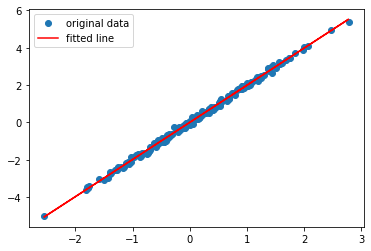

In [97]:
# Se puede graficar fácilmente    
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

# Variables aleatorias y distribuciones 

Recordemos que `numpy.random` provee funciones para generar variables aleatorias. Por ejemplo, `np.random.beta(5, 5, size=3)`genera valores a partir de una función de distribución gamma cuando `a=b=5`. A veces necesitamos acceder a más información como la CDF, los cuantiles, etc. Para ello, podemos utilizar `scipy.stats`, que proporciona toda esta funcionalidad, así como la generación de números aleatorios en una única interfaz coherente.


#### Ejemplo: 
Graficar el histograma y la pdf de una muestra generada aleatoriamente. 

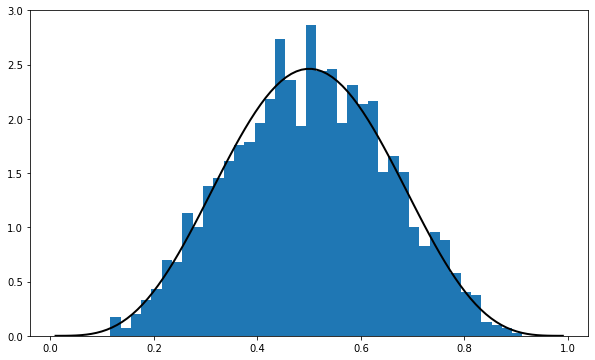

In [109]:
obs = beta.rvs(5, 5, size=2000) # Generar la muestra aleatoria
grid = np.linspace(0.01, 0.99, 100) # Generar los percentiles
# Hacer la gráfica
fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True) # Histograma
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2) # Graficar la pdf
plt.show()

## Optimización 
### Raíces de una función 
Una **raíz** de una función real $f$ en $[a, b]$ es una $x \in [a, b]$ tal que $f (x) = 0$. Por ejemplo, si graficamos la función


<a id='equation-root-f'> </a>
$$
f (x) = \sin (4 (x - 1/4)) + x + x ^ {20} - 1 \tag {11.2}
$$

con $x \ en [0,1]$ obtenemos

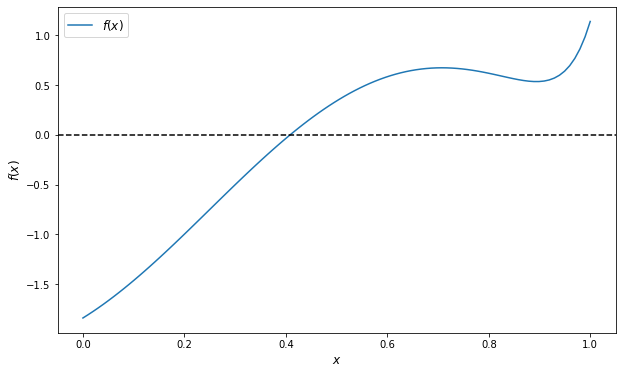

In [110]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

### El método Newton-Raphson
El método de Newton-Raphson es un algoritmo de búsqueda de raíces muy común. En SciPy, este algoritmo es implementado por `scipy.optimize.newton`. Este método utiliza información de pendiente local en un intento de aumentar la velocidad de convergencia. 

Ahora vemos cómo aplicar el método a la función en cuestión. Para esto, se necesita una condición inicial adecuada para la búsqueda. 

In [111]:
from scipy.optimize import newton
# Comenzar el algoritmo con la condición inicial x=0.2
newton(f, 0.2)   

0.40829350427935673

In [112]:
# Pero nótese que no se llega a la solución para cualquier valor inicial 
## Si en lugar elegimos x = 0.7 obtenemos algo erroneo
newton(f, 0.7)  

0.7001700000000279

### Integración
La mayoría de los métodos de integración numérica funcionan calculando la integral de un polinomio aproximado. El error resultante depende de qué tan bien el polinomio se ajuste al integrando, que a su vez depende de qué tan "regular" sea el integrando. En SciPy, el módulo relevante para la integración numérica es `scipy.integrate`. 

Un buen valor predeterminado para la integración univariante es `quad`. 

# Ejemplo
Calcular: 
$$
y = \int_0^1 x^2
$$

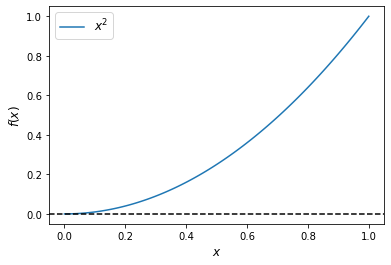

In [34]:
# Gráfica
f = lambda x: x**2
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
ax.plot(x, f(x), label='$x^2$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [36]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337